# *in silico* FRET

In [1]:
import fluordynamics as fd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import futils as fs
import mixmodel as mm
import naturalcolors.colorpalette as ncp
import importlib
from tqdm.notebook import trange, tqdm

In [2]:
importlib.reload(fd.fluorburst)

<module 'fluordynamics.fluorburst' from '/mnt/c/Users/fsteffen/Github/fluordynamics/fluordynamics/fluorburst.py'>

In [3]:
fs.sns_env()

In [4]:
bwo_linseg = ncp.get_cmap('bluewhiteorange')
bwo_colors = ncp.get_colors(bwo_linseg, 5, scramble=False)

In [27]:
parameters = fd.fluorburst.readParameters('trajectory_examples/DNA_parameters.json')

In [28]:
parameters['species']['unix_pattern_don_coords'] = ['*Cy3*.xvg']
parameters['species']['unix_pattern_acc_coords'] = ['*Cy5*.xvg']
parameters['sampling']['nbursts']=2000

In [29]:
experiment = fd.fluorburst.Experiment('trajectory_examples', parameters, compute_anisotropy=True)


------------------------------------
Fluordynamics 0.1.0 - FRET in silico
------------------------------------

Orientation independent R0_const = 5.78 nm

              donor    acceptor
QY            0.20    0.30 
tau (ns)      0.75    1.50
k_f (ns^-1)   0.27    0.20
k_ic (ns^-1)  1.07    0.47
              
Burst averaging method: all
Calculate anisotropy: yes






average FRET efficiency: 0.42 +- 0.05

------------
How to cite:
------------
"An atomistic view on carbocyanine photophysics in the realm of RNA"
F.D. Steffen, R.K.O. Sigel, R. Börner, Phys. Chem. Chem. Phys (2016)


This project was inspired by md2fret:

"In silico FRET from simulated dye dynamics"
M. Hoefling, H. Grubmüller, Comp. Phys. Commun. (2013)



In [30]:
experiment.save('trajectory_examples/dna', remove_bursts=True)

In [24]:
import os

In [26]:
path = os.path.dirname(fd.__file__)

In [17]:
experiment2 =  fd.fluorburst.Experiment.load('trajectory_examples/dna')

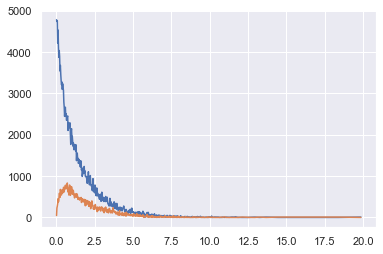

In [14]:
plt.plot(experiment.polIntensity['A_p'][:,0], experiment.polIntensity['A_p'][:,1])
plt.plot(experiment.polIntensity['A_p'][:,0], experiment.polIntensity['A_p'][:,2])

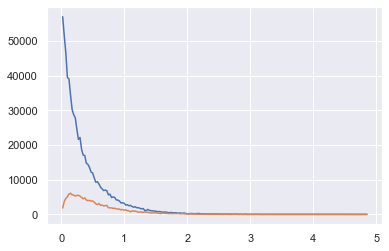

In [34]:
plt.plot(experiment.polIntensity['D_p'][:,0], experiment.polIntensity['D_p'][:,1])
plt.plot(experiment.polIntensity['D_p'][:,0], experiment.polIntensity['D_p'][:,2])


(array([3.12408e+05, 1.92012e+05, 1.23198e+05, 7.88170e+04, 5.43480e+04,
        3.65400e+04, 2.42620e+04, 1.72180e+04, 1.13730e+04, 7.57300e+03,
        5.44200e+03, 4.01100e+03, 2.37300e+03, 2.00500e+03, 1.27800e+03,
        8.46000e+02, 7.25000e+02, 4.98000e+02, 3.11000e+02, 2.26000e+02,
        1.69000e+02, 7.20000e+01, 9.80000e+01, 5.00000e+01, 3.40000e+01,
        1.20000e+01, 3.20000e+01, 8.00000e+00, 1.60000e+01, 2.60000e+01]),
 array([0.        , 0.16136667, 0.32273333, 0.4841    , 0.64546667,
        0.80683333, 0.9682    , 1.12956667, 1.29093333, 1.4523    ,
        1.61366667, 1.77503333, 1.9364    , 2.09776667, 2.25913333,
        2.4205    , 2.58186667, 2.74323333, 2.9046    , 3.06596667,
        3.22733333, 3.3887    , 3.55006667, 3.71143333, 3.8728    ,
        4.03416667, 4.19553333, 4.3569    , 4.51826667, 4.67963333,
        4.841     ]),
 <a list of 30 Patch objects>)

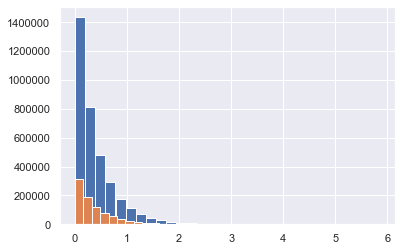

In [35]:
plt.hist(experiment.decaytimes_DD_DA['D_ic'], bins=30)
plt.hist(experiment.decaytimes_DD_DA['D_p'], bins=30)

(array([3.8158e+04, 3.3396e+04, 2.9480e+04, 2.5954e+04, 2.2278e+04,
        1.9727e+04, 1.6360e+04, 1.3577e+04, 1.0944e+04, 9.5010e+03,
        7.8630e+03, 6.5360e+03, 5.1300e+03, 4.1650e+03, 3.4030e+03,
        2.5640e+03, 1.9570e+03, 1.5440e+03, 1.1340e+03, 9.2500e+02,
        6.2900e+02, 4.4700e+02, 4.6800e+02, 3.5000e+02, 2.7400e+02,
        1.7000e+02, 1.1600e+02, 5.4000e+01, 3.8000e+01, 2.8000e+01]),
 array([0.   , 0.195, 0.39 , 0.585, 0.78 , 0.975, 1.17 , 1.365, 1.56 ,
        1.755, 1.95 , 2.145, 2.34 , 2.535, 2.73 , 2.925, 3.12 , 3.315,
        3.51 , 3.705, 3.9  , 4.095, 4.29 , 4.485, 4.68 , 4.875, 5.07 ,
        5.265, 5.46 , 5.655, 5.85 ]),
 <a list of 30 Patch objects>)

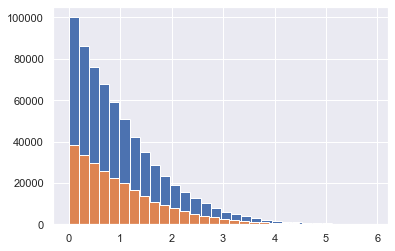

In [52]:
plt.hist(experiment.decaytimes_AA['A_ic'], bins=30)
plt.hist(experiment.decaytimes_AA['A_p'], bins=30)


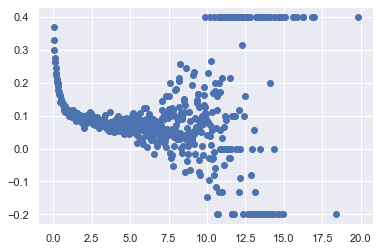

In [36]:
plt.plot(experiment.anisotropy['A_p'][:,0], experiment.anisotropy['A_p'][:,1], 'o')

In [38]:
g = np.loadtxt('../tests/examples/p19_Cy3coords.xvg', comments=['@', '#'])
g2 = np.loadtxt('../tests/examples/Cy3_C2C14_0_1.xvg', comments=['@', '#'])

In [47]:
v = g[:,4:7]-g[:,1:4]
v2 = g2[:,4:7]-g2[:,1:4]

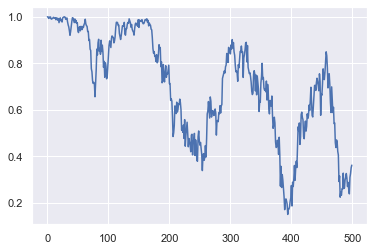

In [69]:
h = [(np.dot(v2[0], v2[i])/(np.linalg.norm(v2[0])*np.linalg.norm(v2[i])))**2 for i in range(0, 500, 1)]
plt.plot(h)

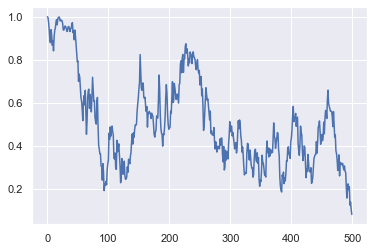

In [68]:
h = [(np.dot(v[0], v[i])/(np.linalg.norm(v[0])*np.linalg.norm(v[i])))**2 for i in range(0,500, 1)]
plt.plot(h)

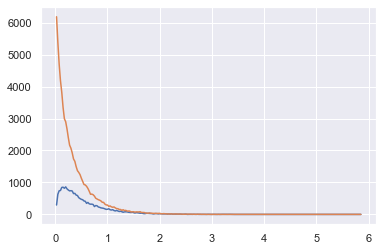

In [16]:
plt.plot(bins,s_counts)
plt.plot(bins,p_counts)

In [259]:
len(np.array(p_counts))

89

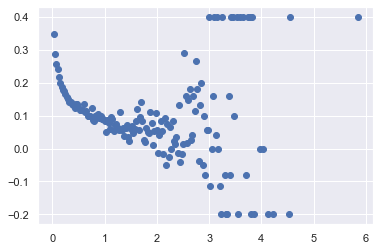

In [17]:
plt.plot(bins, 2/5*(np.array(p_counts)-np.array(s_counts))/(np.array(p_counts)+2*np.array(s_counts)), 'o')

In [39]:
hist, bins = np.histogram(experiment.FRETefficiencies, bins=20, range=(0,1))
bincenters, binwidth = fs.bincenters(bins)
model = mm.Mix('gaussian', bincenters, hist/sum(hist), [0.5, 0.1])

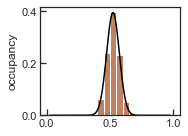

In [46]:
with sns.axes_style('ticks'):
    fs.set_ticksStyle()
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 2), sharex=False, sharey=False, squeeze=False)
    plt.bar(bincenters, hist/sum(hist), binwidth*2, color=bwo_colors[4])
    plt.plot(model.x_fit, model.y_fit, '-', color='black')
    ax[0,0].set_xlabel('FRET')
    ax[0,0].set_ylabel('occupancy')
    fs.savefig('FRET_P19', 'pdf')

In [45]:
help(fs.savefig)

Help on function savefig in module futils:

savefig(filename, formats=['png', 'pdf'], dpi=1200, transparent=True, overwrite=False, create_folder=True)



In [27]:
hist, bins = np.histogram(experiment.FRETefficiencies, bins=20, range=(0,1))
bincenters, binwidth = fs.bincenters(bins)
model = mm.Mix('gaussian', bincenters, hist/sum(hist), [0.5, 0.1])

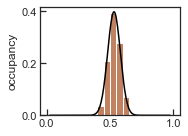

In [28]:
with sns.axes_style('ticks'):
    fs.set_ticksStyle()
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 2), sharex=False, sharey=False, squeeze=False)
    plt.bar(bincenters, hist/sum(hist), binwidth*2, color=bwo_colors[4])
    plt.plot(model.x_fit, model.y_fit, '-', color='black')
    ax[0,0].set_xlabel('FRET')
    ax[0,0].set_ylabel('occupancy')

In [14]:
hist, bins = np.histogram(experiment.FRETefficiencies, bins=20, range=(0,1))
bincenters, binwidth = fs.bincenters(bins)

In [15]:
model = mm.Mix('gaussian', bincenters, hist/sum(hist), [0.5, 0.1])

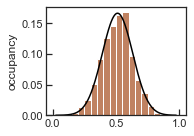

In [16]:
with sns.axes_style('ticks'):
    fs.set_ticksStyle()
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 2), sharex=False, sharey=False, squeeze=False)
    plt.bar(bincenters, hist/sum(hist), binwidth*2, color=bwo_colors[4])
    plt.plot(model.x_fit, model.y_fit, '-', color='black')
    ax[0,0].set_xlabel('FRET')
    ax[0,0].set_ylabel('occupancy')

In [10]:
model.popt

array([0.53689401, 0.12109608])

In [46]:
rng = np.random.default_rng()


In [20]:
np.random.default_rng(12345)

Generator(PCG64) at 0x7FCBBB1D9E50

In [37]:
a = list(rng.choice([1,3,4,5,6,7,8,6,5,4,4], 10000000))

In [51]:
a = [rng.random(size=2) for i in range(10**5)]